### Libraries

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
from texthero import stopwords
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

### Chunking CSV to upload onto GitHub

import pandas as pd

chunk_size = 55000
batch_no = 1

for chunk in pd.read_csv('221100_DayZ.csv', chunksize=chunk_size):
    #chunk.to_csv('221100_DayZ' + str(batch_no) + '.csv', index=False)
    #batch_no +=1

### Dataset

In [2]:
steamData = pd.read_csv('steam_data/steam.csv')
#steamSupportInfo = pd.read_csv('steam_data/steam_support_info.csv')
#steamChart = pd.read_csv('steam_data/steamCharts.csv')
#steamSpyTagData = pd.read_csv('steam_data/steamspy_tag_data.csv')
steamGames = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_games/steam_games*.csv"))))
#steamMediaData = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_media_data/steam_media_data*.csv"))))
#steamRequirements = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_requirements/steam_requirements*.csv"))))
#steamDescription = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_description/steam_description*.csv"))))

#game reviews
#steam_HalfOfTheGameReviews = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))))
#files = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
#steamReviews_fromFolder = pd.concat([pd.read_csv(f) for f in files ])
#steamReviewsDF = [steam_HalfOfTheGameReviews, steamReviews_fromFolder]
#steamCombinedReviews = pd.concat(steamReviewsDF)


#game reviews
firstHalfReviewFiles =glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))
secondHalfReviewFiles = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
allReviewFiles = firstHalfReviewFiles + secondHalfReviewFiles
print(len(allReviewFiles))

191


### Cleaning the Dataset

##### renaming and getting the columns we need

In [ ]:
#rename for easier identification
steamGames = steamGames.rename(columns={"name": "title"})
steamData = steamData.rename(columns={"name": "title", "genres":"genre"})

#drop columns
steamGames = steamGames[["title", "genre","release_date"]]
steamData = steamData[['title', 'genre', 'positive_ratings', 'negative_ratings']]

In [ ]:
#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamCombinedReviews['title'] = hero.clean(steamCombinedReviews['title'], pipeline = custom_pipeline)
steamGames['title'] = hero.clean(steamGames['title'], pipeline = custom_pipeline)
steamData['title'] = hero.clean(steamData['title'], pipeline = custom_pipeline)

In [3]:
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["game","mods","/"]))

custom_pipeline_review = [preprocessing.fillna
                          , preprocessing.lowercase
                          , preprocessing.remove_punctuation
                          , preprocessing.remove_diacritics
                          , preprocessing.remove_whitespace
                          ,preprocessing.remove_digits]
                          #, preprocessing.drop_no_content]

In [31]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

testingDF = pd.DataFrame(columns=['clean_reviews'])
for files in chunks(allReviewFiles,20):
    reviewsDF = pd.concat([pd.read_csv(f, encoding = "ISO-8859-1", engine='python') for f in files])
    reviewsDF = reviewsDF[["title", "review","voted_up"]]
    #print(reviewsDF)
    
    reviewsDF = reviewsDF.reset_index(drop=True)
    
    reviewSerie = hero.clean(reviewsDF.review, pipeline=custom_pipeline_review)
    reviewSerie = hero.remove_stopwords(reviewSerie, custom_stopwords)
    reviews = reviewSerie.to_frame().reset_index(drop=True)

In [21]:
reviewsDF

,title,review,voted_up
0,PLAYERUNKNOWN'S BATTLEGROUNDS,im the one idiot here who paid full price. ive...,False
1,PLAYERUNKNOWN'S BATTLEGROUNDS,its very hard at first but once you get the ha...,True
2,PLAYERUNKNOWN'S BATTLEGROUNDS,Nah this game dodo,False
3,PLAYERUNKNOWN'S BATTLEGROUNDS,get big lmg pewpew,True
4,PLAYERUNKNOWN'S BATTLEGROUNDS,yes,True
...,...,...,...
607322,The Elder Scrolls V Skyrim,Epic!,True
607323,The Elder Scrolls V Skyrim,This game...,True
607324,The Elder Scrolls V Skyrim,"Waifu Simulator 2011, OH THANK YOU BETHESDA.",True
607325,The Elder Scrolls V Skyrim,"GET IT YOU GNOMERS! :P Fourms be damned, Skyri...",True


In [22]:
reviews

,review
0,im one idiot paid full price ive played fo...
1,hard first get hang bad
2,nah dodo
3,get big lmg pewpew
4,yes
...,...
607322,epic
607323,
607324,waifu simulator oh thank bethesda
607325,get gnomers p fourms damned skyrim suck ...


In [32]:
reviews = reviews.rename(columns={"review": "clean_review"})
reviews = reviews[['clean_review']]

#reviewsDF = reviewsDF[['title', 'review', 'voted_up']]


In [33]:
reviewsCleanDF = pd.concat([reviewsDF, reviews], axis=1)
reviewsCleanDF = reviewsCleanDF[['title', 'clean_review', 'voted_up']]
reviewsCleanDF

,title,clean_review,voted_up
0,PLAYERUNKNOWN'S BATTLEGROUNDS,im one idiot paid full price ive played fo...,False
1,PLAYERUNKNOWN'S BATTLEGROUNDS,hard first get hang bad,True
2,PLAYERUNKNOWN'S BATTLEGROUNDS,nah dodo,False
3,PLAYERUNKNOWN'S BATTLEGROUNDS,get big lmg pewpew,True
4,PLAYERUNKNOWN'S BATTLEGROUNDS,yes,True
...,...,...,...
607322,The Elder Scrolls V Skyrim,epic,True
607323,The Elder Scrolls V Skyrim,,True
607324,The Elder Scrolls V Skyrim,waifu simulator oh thank bethesda,True
607325,The Elder Scrolls V Skyrim,get gnomers p fourms damned skyrim suck ...,True


In [36]:
reviewsCleanDF['clean_review'] = reviewsCleanDF['clean_review'].astype(str) 

In [37]:
reviewsCleanDF.dtypes

title           object
clean_review    object
voted_up          bool
dtype: object

In [38]:
nan_value = float("NaN")
reviewsCleanDF.replace("", np.nan, inplace=True)
reviewsCleanDF.dropna(subset = ["clean_review"], inplace=True)
reviewsCleanDF.reset_index(drop=True)



,title,clean_review,voted_up
0,PLAYERUNKNOWN'S BATTLEGROUNDS,im one idiot paid full price ive played fo...,False
1,PLAYERUNKNOWN'S BATTLEGROUNDS,hard first get hang bad,True
2,PLAYERUNKNOWN'S BATTLEGROUNDS,nah dodo,False
3,PLAYERUNKNOWN'S BATTLEGROUNDS,get big lmg pewpew,True
4,PLAYERUNKNOWN'S BATTLEGROUNDS,yes,True
...,...,...,...
600139,The Elder Scrolls V Skyrim,epic,True
600140,The Elder Scrolls V Skyrim,,True
600141,The Elder Scrolls V Skyrim,waifu simulator oh thank bethesda,True
600142,The Elder Scrolls V Skyrim,get gnomers p fourms damned skyrim suck ...,True


In [39]:
reviewsCleanDF.iloc[600140]

title           The Elder Scrolls V Skyrim
clean_review                              
voted_up                              True
Name: 607323, dtype: object

In [40]:
reviewsCleanDF.isnull().values.any()

False

In [41]:
reviewsCleanDF.dtypes

title           object
clean_review    object
voted_up          bool
dtype: object

##### Getting title, genre, release date, reviews and ratings

##### putting the data into another dataframe 

In [ ]:
steamGames_Title_Genre = steamGames
steamData_Title_Rating = steamData

##### matching title

In [ ]:
#Genre
matchTitleGenre = steamGames_Title_Genre.title.isin(steamCombinedReviews.title)
steamMatchTitleGenre = steamGames_Title_Genre[matchTitleGenre]

#Rating
matchTitleRating = steamData_Title_Rating.title.isin(steamCombinedReviews.title)
steamMatchTitleRating = steamData_Title_Rating[matchTitleRating]


##### dropping duplicate values

In [ ]:
#Genre
steamUniqueTitleGenre = steamMatchTitleGenre.drop_duplicates(['title'])
steamUniqueTitleGenre = steamUniqueTitleGenre.reset_index(drop=True)

#Rating
steamUniqueTitleRating = steamMatchTitleRating.reset_index(drop=True)

#Drop nan rows
nan_value = float("NaN")
steamUniqueTitleGenre.replace("", nan_value, inplace=True)
steamUniqueTitleGenre.dropna(subset = ["genre"], inplace=True)

steamUniqueTitleRating.replace("", nan_value, inplace=True)
steamUniqueTitleRating.dropna(subset = ["title"], inplace=True)

##### remove values that we don't use

In [ ]:
#Genre
steamUniqueTitleGenre['genre'] = steamUniqueTitleGenre.genre.str.replace(',Early Access?', '')
steamUniqueTitleGenre['genre'] = steamUniqueTitleGenre.genre.str.replace('Early Access,?', '')
steamUniqueTitleGenre['genre'] = steamUniqueTitleGenre.genre.str.replace(',Free to Play?', '')
steamUniqueTitleGenre['genre'] = steamUniqueTitleGenre.genre.str.replace('Free to Play,?', '')

steamUniqueTitleGenre['release_date'] = steamUniqueTitleGenre.release_date.str.replace('Early Access' , '')
steamUniqueTitleGenre['release_date'] = steamUniqueTitleGenre.release_date.str.replace('Coming Soon' , '')
steamUniqueTitleGenre['release_date'] = steamUniqueTitleGenre.release_date.str.replace('To Be Announced' , '')

#steamUniqueTitleGenre.to_excel("steamUniqueTitleGenre.xlsx")

#Rating
steamUniqueTitleRating['genre'] = steamUniqueTitleRating.genre.str.replace(';Early Access?', '')
steamUniqueTitleRating['genre'] = steamUniqueTitleRating.genre.str.replace('Early Access;?', '')
steamUniqueTitleRating['genre'] = steamUniqueTitleRating.genre.str.replace(';Free to Play?', '')
steamUniqueTitleRating['genre'] = steamUniqueTitleRating.genre.str.replace('Free to Play;?', '')

#steamUniqueTitleRating.to_excel("steamUniqueTitleRating.xlsx")

### Genre

##### split genre into 6 columns

In [ ]:
steamUniqueTitleGenre[['genre1', 'genre2', 'genre3','genre4','genre5','genre6']] = steamUniqueTitleGenre['genre'].str.split(',', expand=True)

In [ ]:
steamUniqueTitleGenre

##### dropping genre, title, and release date columns to get the total count of genre

In [ ]:
steamGenreCount = steamUniqueTitleGenre.drop(columns=['genre','title', 'release_date'])

##### reset index and rename the column

In [ ]:
steamGenreGraph = steamGenreCount.stack().value_counts().reset_index()
steamGenreGraph.columns = ['genre','count']
steamGenreGraph

##### graph to see which genre is most popular 

In [ ]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x="genre", y="count", data=steamGenreGraph, ax=ax)

we can see that most of the games' genres are action, indie and simulation. Hence, We can conclude that players are most likely to play these genres compared to the rest.

In [ ]:
# storing last 4 letters of release_date as year
steamGenre_Date = steamUniqueTitleGenre
steamGenre_Date['year'] = steamGenre_Date['release_date'].str.slice(-4)

#dropping unused columns
steamGenre_Date = steamUniqueTitleGenre.drop(columns=['title', 'genre1', 'genre2', 'genre3','genre4','genre5','genre6'])
steamGenre_Date

##### storing the top 3 genre individually

In [ ]:
action =steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("action", case=False)]
indie =steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("indie", case=False)]
simulation = steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("simulation", case=False)]

##### converting year to int

In [ ]:
action["year"] = pd.to_numeric(action["year"])
indie["year"] = pd.to_numeric(indie["year"])
simulation["year"] = pd.to_numeric(simulation["year"])

action["year"] = action["year"].fillna(0.0).astype(int)
indie["year"] = indie["year"].fillna(0.0).astype(int)
simulation["year"] = simulation["year"].fillna(0.0).astype(int)

##### dropping rows that has 2020 in "year" column because it is outlier

In [ ]:
# Get names of indexes for which column action has value 2020
indexAction = action[action['year'] == 2020].index
# Delete these row indexes from dataFrame
indexAction = action.drop(indexAction , inplace=True)

# Get names of indexes for which indie action has value 2020
indexIndie = indie[indie['year'] == 2020].index
# Delete these row indexes from dataFrame
indexIndie = indie.drop(indexIndie , inplace=True)

# Get names of indexes for which column simulation has value 2020
indexSimulation = simulation[simulation['year'] == 2020].index
# Delete these row indexes from dataFrame
indexIndie = simulation.drop(indexSimulation , inplace=True)


##### grouping data based on year

In [ ]:
groupedAction = action.groupby("year").count()
groupedIndie = indie.groupby("year").count()
groupedSimulation = simulation.groupby("year").count()

#reset index
groupedAction.reset_index(inplace=True)
groupedIndie.reset_index(inplace=True)
groupedSimulation.reset_index(inplace=True)

##### rename and convert the count to corresponding genre

In [ ]:
groupedAction = groupedAction.rename(columns={'genre': 'action count'})
groupedAction['action count'] = groupedAction['action count'].astype(int)

groupedIndie = groupedIndie.rename(columns={'genre': 'indie count'}) 
groupedIndie['indie count'] = groupedIndie['indie count'].astype(int)

groupedSimulation = groupedSimulation.rename(columns={'genre': 'simulation count'})
groupedSimulation['simulation count'] = groupedSimulation['simulation count'].astype(int)

#drop "release_date" column
groupedAction = groupedAction.drop(columns=['release_date'])
groupedIndie = groupedIndie.drop(columns=['release_date'])
groupedSimulation = groupedSimulation.drop(columns=['release_date'])


##### merge the top 3 dataframes into one for lineplot

In [ ]:
genreTimeLine = groupedAction.merge(groupedIndie,on='year').merge(groupedSimulation,on='year')
genreTimeLine

In [ ]:
plt.figure(figsize=(15,8))
sb.lineplot(x='year', y='value', hue='variable', 
             data=pd.melt(genreTimeLine, ['year']))

ya = ax.get_yaxis()
ya.set_major_locator(MaxNLocator(integer=True))

xa = ax.get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True))

plt.show()

 We can see that there is a sharp drop in 2019. 
 
 Based on this article, https://gamedaily.biz/article/1489/year-over-year-game-release-numbers-slowed-for-steam-in-2019 , they also said that there is a drop 2019 which is the same as the graph shown above. They mentioned that the drop may be due to the Steam’s notoriously-difficultmarketing and discoverability environment.

### Rating 

In [ ]:
steamUniqueTitleRating

##### getting total ratings

In [ ]:
#sum_column = steamUniqueTitleRating["positive_ratings"] + steamUniqueTitleRating["negative_ratings"]
#steamUniqueTitleRating["total_ratings"] = sum_column
#steamUniqueTitleRating

# sort the dataframe based on total_ratings
#steamUniqueTitleRating.sort_values(by=['total_ratings'], ascending=False)

In [ ]:
#top5_Rating = steamUniqueTitleRating.nlargest(5,['total_ratings'])
#below5_Rating = steamUniqueTitleRating.nsmallest(5,['total_ratings'])

In [ ]:
#frames = [top5_Rating, below5_Rating]
#ratingDF = pd.concat(frames)

In [ ]:
steamUniqueTitleRating['type'] = 'Free'
steamUniqueTitleRating.loc[steamUniqueTitleRating['price'] > 0, 'type'] = 'Paid'

In [ ]:
steamUniqueTitleRating.to_excel("output.xlsx")

In [ ]:
action = steamUniqueTitleRating.loc[steamUniqueTitleRating['genre'].str.contains("action", case=False)]
indie =steamUniqueTitleRating.loc[steamUniqueTitleRating['genre'].str.contains("indie", case=False)]
simulation = steamUniqueTitleRating.loc[steamUniqueTitleRating['genre'].str.contains("simulation", case=False)]
strategy = steamUniqueTitleRating.loc[steamUniqueTitleRating['genre'].str.contains("strategy", case=False)]
rpg = steamUniqueTitleRating.loc[steamUniqueTitleRating['genre'].str.contains("rpg", case=False)]
sports = steamUniqueTitleRating.loc[steamUniqueTitleRating['genre'].str.contains("sports", case=False)]
racing = steamUniqueTitleRating.loc[steamUniqueTitleRating['genre'].str.contains("racing", case=False)]

In [ ]:
action

##### summing all the postive rating and negative rating separately

In [ ]:
#action
action_posRating = action['positive_ratings'].sum()    
action_negRating = action['negative_ratings'].sum() 

#indie
indie_posRating = indie['positive_ratings'].sum()    
indie_negRating = indie['negative_ratings'].sum()  

#simulation
simulation_posRating = simulation['positive_ratings'].sum()    
simulation_negRating = simulation['negative_ratings'].sum() 

#strategy
strategy_posRating = strategy['positive_ratings'].sum()    
strategy_negRating = strategy['negative_ratings'].sum()

#rpg
rpg_posRating = rpg['positive_ratings'].sum()    
rpg_negRating = rpg['negative_ratings'].sum()

#sports
sports_posRating = sports['positive_ratings'].sum()    
sports_negRating = sports['negative_ratings'].sum()

#racing
racing_posRating = sports['positive_ratings'].sum()    
racing_negRating = sports['negative_ratings'].sum()

In [ ]:
# initialize data of lists.
data = {'genre':['action', 'indie', 'simulation', 'strategy', 'rpg', 'sports', 'racing'],
        'positive_ratings':[action_posRating, indie_posRating, simulation_posRating, strategy_posRating, rpg_posRating, sports_posRating, racing_posRating],
        'negative_ratings':[action_negRating, indie_negRating, simulation_negRating, strategy_negRating, rpg_negRating, sports_negRating, racing_negRating]
       }
  
# Create DataFrame
genreRating = pd.DataFrame(data)

In [ ]:
#sum_column = genreRating["positive_ratings"] + genreRating["negative_ratings"]
#genreRating["total_ratings"] = sum_column

In [ ]:
genreRating = genreRating.set_index('genre')

In [ ]:
genreRating = genreRating.div(genreRating.sum(axis=1), axis=0)*100

In [ ]:
genreRating.plot(kind = 'barh', stacked = True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("rating of each genre")
plt.xlabel("rating in percentage")

we can see that simulation and indie have a lot more postive ratings compared to the rest. We thought that action would receive more postive rating as it is considered the most popular genre. The reason why simulation and indie has more postive rating may be due to factors such as lenghth of game play and content of the game which we will explore later.

### Reviews

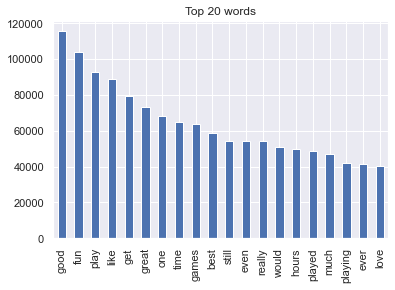

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [44]:
NUM_TOP_WORDS = 20

top_20 = hero.visualization.top_words(reviewsCleanDF['clean_review']).head(NUM_TOP_WORDS)

# Draw the bar chart

top_20.plot.bar(rot=90, title="Top 20 words");

plt.show(block=True);


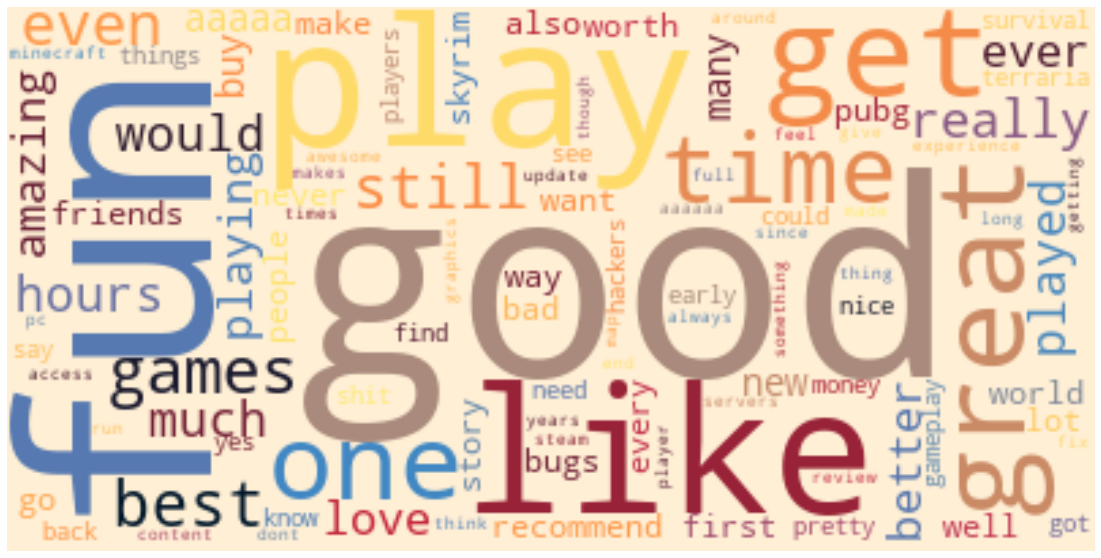

In [45]:
hero.wordcloud(reviewsCleanDF['clean_review'], max_words=100,)

Some popular words that can be observed here include “good,” “fun" and "great". Also, there are some negative words such
as "bad" and "shit". However, there are more postivive word, indicating that most reviews in the dataset express a positive sentiment.